In [5]:
#Importing library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics

#importing datset
dataset=pd.read_csv("nasa.csv")

# import time for comparing Tuning methods
from time import time
start=0
#droping dataset coloumns
dataset.drop( ['Close Approach Date'], axis = 1, inplace = True)
dataset.drop( ['Orbiting Body'], axis = 1, inplace = True)
dataset.drop( ['Orbit Determination Date'], axis = 1, inplace = True)
dataset.drop( ['Equinox'], axis = 1, inplace = True)

dataset.drop(dataset.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]],axis=1, inplace = True)


#data conversion into dependent and target varible 
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [6]:
#Label Encoding for enodig the raget varibles
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(Y)
#spiltting data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=22)


#standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# KNN

In [7]:
#Loading and fitting data into Knn
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=10)  
neighbors.fit(X_train, Y_train)
neighbors


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [8]:
#Accuracy
from sklearn.metrics import accuracy_score
# Predict using 10-NN Classifier
y_pred = neighbors.predict(X_test)
y_pred[0:20]
accuracy_score(Y_test,y_pred)*100


85.82089552238806

In [9]:
#FEATURE SELECTION
#the selction of k value method
#Searching for the best K in the dataset
K = 10
mean_acc = np.zeros((K-1))
#feature selection of k from 1 to 10 which has better accuracy
for n in range(1,K):     #range (start ,end)
    
    #Train Model and Predict 
    #constructing it  for k=1 to k=10 cross validation
    neighbors = KNeighborsClassifier(n_neighbors = n)                 #Assigning value of n(1 to 10) in the loop
    neighbors.fit(X_train,Y_train)       #fitting data
    y_pred=neighbors.predict(X_test)    #predicting
    mean_acc[n-1] = metrics.accuracy_score(Y_test, y_pred)    #Storing Accuracy of the each cross validation 




In [10]:
mean_acc                                 #printing values of k
print("For the values k=1 to k=9: \n",mean_acc)

For the values k=1 to k=9: 
 [0.81236674 0.84434968 0.8336887  0.84648188 0.84221748 0.86034115
 0.84861407 0.85927505 0.85607676]


In [11]:
mean_acc.mean()                       #mean of all rhe values of k (1 to10)
print("The value is mean of all values k=1 to k=9   : ",mean_acc.mean()*100)

The value is mean of all values k=1 to k=9   :  84.48235015399194


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


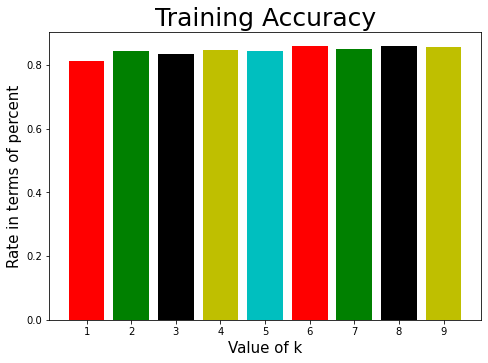

In [12]:
#plotting the graph for the selection of the k th values
#Bar plot for training data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])#left,bootom ,width ,height                                                                                             #Add an axes to the figure.

value_k = ["1","2","3","4","5","6","7","8","9"]     #X AXIS
accuracy = [0.81236674, 0.84434968, 0.8336887,  0.84648188 ,0.84221748, 0.86034115,
 0.84861407, 0.85927505 ,0.85607676]                         #Y AXIS
ax.bar(value_k,accuracy,color='rgkyc')        #rgkyc-different color
plt.title("Training Accuracy",fontsize=25)    #title label
plt.xlabel("Value of k",fontsize=15)    #X label
plt.ylabel("Rate in terms of percent",fontsize=15)    #Y label
plt.show()    #Display a figure


# KNN cv

In [24]:
#For cross validation
from sklearn.model_selection import cross_val_score
knn_scores = []
#cross validation for the k value from 1 to 10
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)         #Assigniing value of k form 1 to 10
    score=cross_val_score(knn_classifier,X_train,Y_train,cv=10)      #cross validation forr va;lues 1 to 10 each time running cv=10
    knn_scores.append(score.mean())

In [25]:
score   #values of accuracy for the k=1 to k=10

array([0.864     , 0.84533333, 0.81866667, 0.83733333, 0.84266667,
       0.83466667, 0.832     , 0.83733333, 0.83466667, 0.8368984 ])

In [26]:
score.mean()*100    #mean of cross validation

83.83565062388591

Text(0.5, 1.0, 'K Neighbors Classifier scores [1-9]')

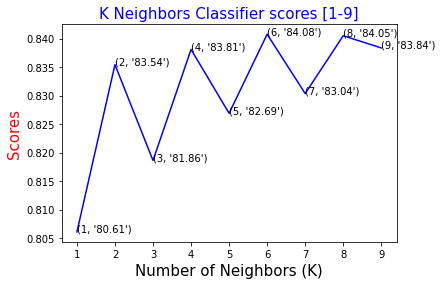

In [27]:
#Plot y versus x as lines and/or markers for the ten values in it
plt.plot([k for k in range(1, 10)], knn_scores, color = 'blue')
for i in range(1,10):     #start,stop
    plt.text(i, knn_scores[i-1], (i,'{:.2f}'.format(knn_scores[i-1]*100)) )     
    #text for te  values accuracy in X-Y plot
plt.xticks([i for i in range(1, 10)])      #Set the current  locations and labels of the x-axis.
plt.xlabel('Number of Neighbors (K)',fontsize=15)   #assign labels for the X axis
plt.ylabel('Scores',fontsize=15,color="RED")        #assign labels for the Y axis
plt.title('K Neighbors Classifier scores [1-9]',fontsize=15,color="BLUE")    #assign labels for the Title of the graph

In [28]:
print("The best accuracy of k is 6    k=6 --> 86.482")

print("Accuracy with K-NN with CROSS VALIDATION: %0.2f     STD--> (+/- %f)" % (score.mean()*100, score.std() *2*100))


The best accuracy of k is 6    k=6 --> 86.482
Accuracy with K-NN with CROSS VALIDATION: 83.84     STD--> (+/- 2.176591)


In [29]:

#starting of the tuning methods
from sklearn.model_selection import RandomizedSearchCV
#RandomizedSearchCV tuning method which does tuning on sample
from scipy.stats import randint    #for importing random values 

est = KNeighborsClassifier(n_jobs=-1)
#assigning hyperameters for randomized search 
rf_p_dist={  'leaf_size' : randint(1,50),
'n_neighbors' : randint(1,30),
'p':[1,2]
  }
#combinations  50*30*2=3000
#it will be working for limited sample randomly 
def hypertuning_rscv(est, rf_p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=rf_p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    #CV = Cross-Validation (Stratified KFold CV)
    rdmsearch.fit(X,y)               #fitting training data
    ht_params = rdmsearch.best_params_            #best parameter
    ht_score = rdmsearch.best_score_               #best accuracy
    return ht_params, ht_score                       #returning values for the best paramterand its score


rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 5, X_train, Y_train)
#classifier,iteartions,ttraining data
print("best aprmeters",rf_parameters)
print("best score",rf_ht_score)





best aprmeters {'leaf_size': 12, 'n_neighbors': 18, 'p': 2}
best score 0.8524952380952382


# Classification report of knn for the best knn value

In [30]:
#evaluting for the best k=6 values from feature selection
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=6)  #neighbours=6 
neighbors.fit(X_train, Y_train) #fitting data
y_pred=neighbors.predict(X_train)  #predciting training data


In [31]:
from sklearn.metrics import classification_report
report = classification_report(Y_train,y_pred)
print(report)
#for the training data

              precision    recall  f1-score   support

       False       0.87      0.99      0.93      3138
        True       0.82      0.25      0.39       611

    accuracy                           0.87      3749
   macro avg       0.84      0.62      0.66      3749
weighted avg       0.86      0.87      0.84      3749



AUC=0.500
ROC=0.796


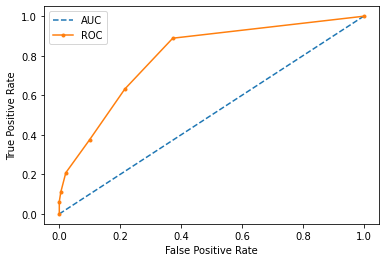

In [32]:
#PLOTTING AUC AND ROC FOR CLASSIFICATION PROBLEM 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, precision_recall_curve,f1_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]
# fit a model


# predict probabilities
lr_probs = neighbors.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('AUC=%.3f' % (ns_auc))
print('ROC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='AUC')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


# SVC

OVERVIEW
1. Load the data and fit it 
2. Now the speration aprt which separte  the classes through a hyperplane
3. For the maximum sepration we should have maximum seration between the classes we will assighn support vectors
4. maximum sepertaion tell which data belongs to which class it classify.

In [33]:
#loading and fitting the dataset
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')               #Assigning kernel(linear,rbf,ploy.) according to the dataset 
clf.fit(X_train, Y_train)                     #fitting in to training data
#training
y_pred=clf.predict(X_train)                     #fitting in to training data for prediction
#testing
y_pred1=clf.predict(X_test)                            #fitting in to testing data for prediction
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
from sklearn.metrics import accuracy_score
print("training accuracy for SVC  :",accuracy_score(Y_train,y_pred)*100)    #Accuarcy for training
print("test accuracy  for SVC     :",accuracy_score(Y_test,y_pred1)*100)    #Accuracy for testing

training accuracy for SVC  : 83.70232061883169
test accuracy  for SVC     : 84.64818763326227


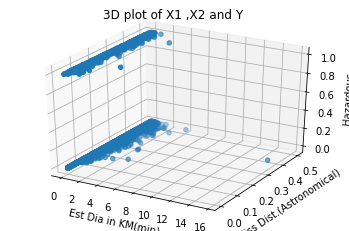

In [35]:
#3D view of scattter plot for the independent varibales with target variable
from mpl_toolkits.mplot3d import Axes3D   #tool kit of matplotlib for plotting 3d data into 2d
fig = plt.figure()                 #for creating new figure
ax = fig.add_subplot(111, projection='3d')                   #*nrows*, *ncols*, and *index*
x = dataset['Est Dia in KM(min)']                     
y = dataset['Miss Dist.(Astronomical)']
z= dataset['Hazardous']
ax.scatter(x, y, z)    #array like data positions for X,Y,Z
ax.set_xlabel('Est Dia in KM(min)')                     #Assigning labels for the dataset which we have computed in  x axis
ax.set_ylabel('Miss Dist.(Astronomical)')               #Assigning labels for the dataset which we have computed in  y axis
ax.set_zlabel('Hazardous')                               #similarly for z axis
plt.title('3D plot of X1 ,X2 and Y ')                    #title label
plt.show()                                              #plotiing the figure


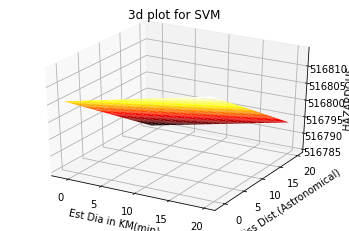

In [36]:
#visulizing the plane which would seperate the the points
tmp = np.linspace(-1,20,20)   #Return evenly spaced numbers over a specified interval.

x,y = np.meshgrid(tmp,tmp)  #Return coordinate matrices from coordinate vectors
#Lambda functions solve this problem. First, we create a lambda function, and assign it to a variable. 
#Then we show that variable is a function, and that we can call it with an argument.
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x-clf.coef_[0][1]*y) / clf.coef_[0][1]
# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')   #(111)-->row,col,index of particular
ax.plot_surface(x, y, z(x,y),cmap="hot")            #For Creating a surface plot.
ax.set_xlabel('Est Dia in KM(min)')                   #Assigning labels for the x ,y ,z
ax.set_ylabel('Miss Dist.(Astronomical)')             #Assigning labels for the x ,y ,z
ax.set_zlabel("HAZARDOUS")                            #Assigning labels for the x ,y ,z
plt.title("3d plot for SVM")                             #Assigning label ffor thr titls
plt.show()

In [37]:
#cross validation value with accuracy and standard deviation
from sklearn.model_selection import cross_val_score

pred_kfold = cross_val_score(clf, X_train, Y_train, cv=10)  #apllying on training data with cv=10 default 
 
print("Accuracy with SVC and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.4f)" % (pred_kfold.mean()*100, pred_kfold.std() * 2))



Accuracy with SVC and K-FOLD CROSS VALIDATION: 83.70 (+/- 0.0016)


In [38]:
#starting of the tuning methods
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

#RandomizedSearchCV tuning method which does tuning on sample
from scipy.stats import randint    #for importing random values 

est = SVC()
#assigning hyperameters for randomized search 
rf_p_dist={  
  'kernel':['linear',"rbf","sigmoid"],
          "decision_function_shape":["ovo","ovr"],
'gamma':["scale", "auto"]}
#it will be working for limited sample randomly 
def hypertuning_rscv(est, rf_p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=rf_p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    #CV = Cross-Validation (Stratified KFold CV)
    rdmsearch.fit(X,y)               #fitting training data
    ht_params = rdmsearch.best_params_            #best parameter
    ht_score = rdmsearch.best_score_               #best accuracy
    return ht_params, ht_score                       #returning values for the best paramterand its score


rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 5, X_train, Y_train)
#classifier,iteartions,ttraining data
print("best aprmeters",rf_parameters)
print("best score",rf_ht_score)



best aprmeters {'kernel': 'rbf', 'gamma': 'auto', 'decision_function_shape': 'ovr'}
best score 0.8450250111259457


In [39]:
#cross validation value with accuracy and standard deviation
from sklearn.metrics import classification_report
report = classification_report(Y_train,y_pred)    #Build a text report showing the main classification metrics
print("                  Classification report of training data ")
print(report)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred1)                           #Accuarcy
print("The accuracy of the SVM will be:",accuracy_score(Y_train,y_pred))


                  Classification report of training data 
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      3138
        True       0.00      0.00      0.00       611

    accuracy                           0.84      3749
   macro avg       0.42      0.50      0.46      3749
weighted avg       0.70      0.84      0.76      3749

The accuracy of the SVM will be: 0.8370232061883169


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random forest 

In [40]:
#INCREASING THE NUMBER OF TREES

In [41]:

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')       #n_estimators-int value #entropy here defines criteria for info. gain and   
classifier.fit(X_train, Y_train)        #fitting dat into training
print(classifier)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [42]:
#starting of the tuning methods
from sklearn.model_selection import RandomizedSearchCV
#RandomizedSearchCV tuning method which does tuning on sample
from scipy.stats import randint    #for importing random values 

est = RandomForestClassifier(n_jobs=-1)
#assigning hyperameters for randomized search 
rf_p_dist={'max_depth':[3,5,10],                               #max_depth=depth of tree
              'n_estimators':[10,100,200,300,400,500],          #NO. of tree
              'max_features':randint(1,3),               #features
               'criterion':['gini','entropy'],                #infoo gain,gini index, gain ratio
               'bootstrap':[True,False],   #with replacement
               'min_samples_leaf':randint(1,4),   #leafes
              }

#we have  3*6*3*2*2*4=864 combinations for the randomised search we will be using
#it will be working for limited sample randomly 


In [43]:
def hypertuning_rscv(est, rf_p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=rf_p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    #CV = Cross-Validation (Stratified KFold CV)
    rdmsearch.fit(X,y)               #fitting training data
    ht_params = rdmsearch.best_params_            #best parameter
    ht_score = rdmsearch.best_score_               #best accuracy
    return ht_params, ht_score                       #returning values for the best paramterand its score


In [44]:


rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 5, X_train, Y_train)
#classifier,iteartions,ttraining data
rf_parameters
rf_ht_score


0.8554282153983088

In [45]:
#Assigning best values for trainig data with hyperparmetrs
claasifier_tune=RandomForestClassifier(bootstrap= True,
 criterion= 'gini',
 max_depth= 5,
 max_features=2,
 min_samples_leaf= 2,
 n_estimators= 10)


In [46]:
#fitting data
#prediction for training data
#prediction for testing data
claasifier_tune.fit(X_train, Y_train)
y_pred=claasifier_tune.predict(X_train)
y_pred1=claasifier_tune.predict(X_test)
print("The train accuracy of the random forest randizedtuned:",accuracy_score(Y_train,y_pred)*100)
print("The test accuracy of the random forest randizedtuned:",accuracy_score(Y_test,y_pred1)*100)



The train accuracy of the random forest randizedtuned: 85.96959189117098
The test accuracy of the random forest randizedtuned: 86.67377398720683


In [47]:

from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


cm = confusion_matrix(Y_train, y_pred)
#precision values for false positive rate
#recall values for false negative rate
cross_val=cross_val_score(claasifier_tune,X_train,Y_train,cv=10,scoring='accuracy')
cross_val1=cross_val_score(claasifier_tune,X_train,Y_train,cv=10,scoring='precision')
cross_val2=cross_val_score(claasifier_tune,X_train,Y_train,cv=10,scoring='recall')


In [48]:

print("The value of training data for 10 values:")
print(cross_val)
print("  The value of training data mean for accuracy :",cross_val.mean()*100)
print(" ")
print(" ")
print("The value of training data for 10 values of precsion:")
print(cross_val1)
print("  The value of training data mean for precision:",cross_val1.mean()*100)
print(" ")
print(" ")
print("The value of training data for 10 values of recall:")
print(cross_val2)
print("  The value of training data meanfor recall:",cross_val2.mean()*100)




The value of training data for 10 values:
[0.864      0.83733333 0.84266667 0.84266667 0.85866667 0.85333333
 0.85066667 0.848      0.85066667 0.85294118]
  The value of training data mean for accuracy : 85.00941176470589
 
 
The value of training data for 10 values of precsion:
[0.77777778 0.78571429 0.58333333 0.53846154 0.86666667 0.73333333
 0.69230769 0.69230769 0.73333333 0.7       ]
  The value of training data mean for precision: 71.03235653235653
 
 
The value of training data for 10 values of recall:
[0.2295082  0.18032787 0.09836066 0.09836066 0.2295082  0.18032787
 0.16393443 0.14754098 0.19354839 0.18032787]
  The value of training data meanfor recall: 17.017451084082495


In [49]:
print("Accuracy  of the training data through randomised tuning:",rf_ht_score*100)

print("The value of  acuuracy training data through k-croos validation:",cross_val.mean()*100)

print("The value of precision training data through k-croos validation :",cross_val1.mean()*100)

print("The value of recall training data through k-croos validation :",cross_val2.mean()*100)


Accuracy  of the training data through randomised tuning: 85.54282153983088
The value of  acuuracy training data through k-croos validation: 85.00941176470589
The value of precision training data through k-croos validation : 71.03235653235653
The value of recall training data through k-croos validation : 17.017451084082495


AUC=0.500
ROC=0.780


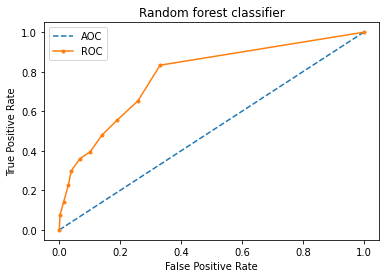

In [50]:
#PLOTTING AUC AND ROC FOR CLASSIFICATION PROBLEM 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from matplotlib import pyplot

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')       #n_estimators-int value #entropy here defines criteria for info. gain and   
classifier.fit(X_train, Y_train)        #fitting dat into training

ns_probs = [0 for _ in range(len(Y_test))]
# fit a model

# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('AUC=%.3f' % (ns_auc))
print('ROC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='AOC')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("Random forest classifier")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


# Ada boost and campare of tuning methods


In [51]:
#Comparring of randomizedserachCV and gridsearchCV
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)   #training data
ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

# Prediction

In [52]:
#prediction for ADA boost
y_pred = ada.predict(X_train)                  #prediction for the training data
y_pred[:20]                                     #predction for the first 20 values


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [53]:
#Tuning methods and comparing Them

In [54]:

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import RandomizedSearchCV
#RandomizedSearchCV-
from scipy.stats import randint  #for random integer values

est = AdaBoostClassifier()
rf_p_dist={
 'n_estimators': [50, 100,200,300,90],
 'learning_rate' : [0.01,0.05,0.1,0.3,1,0.8],
              
  'algorithm':['SAMME.R','SAMME']                        #algo here is for more data SAMME.R  for lower computaion
  
          }
def hypertuning_grid(est, rf_p_dist, nbr_iter,X_train,Y_train):
    rdmsearch = RandomizedSearchCV(est, param_distributions=rf_p_dist,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    rdmsearch.fit(X_train,Y_train)                  #fitting data
    ht_params = rdmsearch.best_params_             #best paramter
    ht_score = rdmsearch.best_score_                     #best scorer
    return ht_params, ht_score                      #returning values for the best accuracy and the best paprmeters



In [55]:
rf_parameters_ran, rf_ht_score_ran = hypertuning_grid(est, rf_p_dist, 1, X_train, Y_train)
end=time()                         #starting time
train_time_adatune=end-start                 #end time
print("train_time_ada_rand_tune  :",train_time_adatune)


train_time_ada_rand_tune  : 1626260816.773473


In [56]:
print("accuracy of training data ",rf_ht_score_ran*100)                    #accuracy with traing data

accuracy of training data  83.70232309746328


In [57]:
#Now compute the time for Grid Search CV and campare
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
est=AdaBoostClassifier()
from scipy.stats import randint
parameters={
 'n_estimators': [50, 100,200,300,90],           #no of trees
 'learning_rate' : [0.01,0.05,0.1,0.3,1,0.8],             #rate of learning for assigning optimal local iinima.
              
  'algorithm':['SAMME.R','SAMME']
  
          }

grid_search = GridSearchCV(estimator = est,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv =5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)                    #fitting data
end=time()                                          #starting time
train_aadagrid=end-start              #end time
print("train_aadagrid",train_aadagrid)

train_aadagrid 1626260906.7826192


In [58]:

accuracy = grid_search.best_score_

print("Accuracy of the training ada boost gridsearch ",accuracy*100)

Accuracy of the training ada boost gridsearch  85.4095238095238


# Time to check the better ones in terms of computation time 

In [59]:
#taking the last 3 values
time_randomised=630.1231083    #158707630.123183 time for training
time_grid=904.1174705      #1587070904.1174705 time for training

time_diff=time_grid-time_randomised
print("time_randomised  :",time_randomised)# in this we are making iterations 20
print("time_grid        :",time_grid)# In this we are making iterations 5
print("time_diff        :",time_diff)
print(" ")

time_randomised  : 630.1231083
time_grid        : 904.1174705
time_diff        : 273.99436219999996
 


In [60]:
#Plotting the difference for these values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


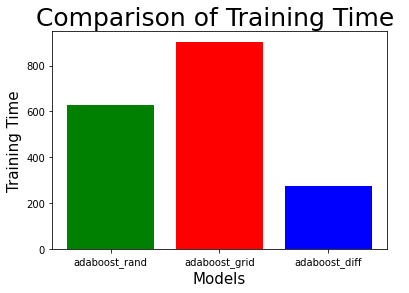

In [61]:
model = [   "adaboost_rand" ,"adaboost_grid","adaboost_diff"]   #X-axis
Train_Time = [
    
    time_randomised,
    time_grid,
    time_diff                #diff is small in terms of value
]
plt.bar(model, Train_Time,color="grb")    #bar plotting
plt.xlabel('Models', fontsize=15)    #  X-labels
plt.ylabel('Training Time', fontsize=15)   #  Y-labels
plt.title('Comparison of Training Time ',fontsize=25)   #title
plt.show()                 #plot figure


AUC=0.500
ROC=0.843


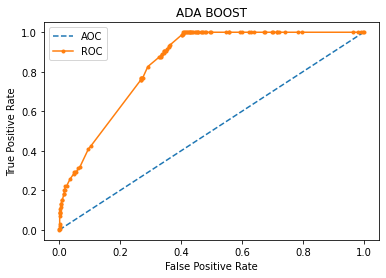

In [62]:
#PLOTTING AUC AND ROC FOR CLASSIFICATION PROBLEM 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from matplotlib import pyplot
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)   #training data

ns_probs = [0 for _ in range(len(Y_test))]
# fit a model

# predict probabilities
lr_probs = ada.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('AUC=%.3f' % (ns_auc))
print('ROC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='AOC')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("ADA BOOST")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


#GRADIENT BOOSTING

In [63]:
#ensemble learning works on boosting parallel learning from the errror from the 
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(X_train,Y_train)   #fitting training data


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
y_pred=GBC.predict(X_train)   #prediction for the x train
y_pred[:10]        #prediction for the 10 values

array([False, False, False, False, False, False, False, False, False,
       False])

In [65]:
accuracy_score(Y_train,y_pred)*100                 #acuuracy

86.50306748466258

In [66]:

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
est=GradientBoostingClassifier()  
from scipy.stats import randint
parameters={
    'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],       #rate of learning for assigning optimal local iinima 
    "max_depth":[1,3,5,7,9],                                   #assigning depth for the trees
    'n_estimators':[100,250,500,750,1000,1250,1500,1750]}             #assigning valies for theom of trees
#combinations 6*5*8=240 combinantions
grid_search = GridSearchCV(estimator = est,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

In [ ]:
grid_search = grid_search.fit(X_test, Y_test)    #fitting data
print("Accuracy for the training Gradient descent :",accuracy_score(Y_train,y_pred)*100)
print("Accuracy for the testing Gradient descent :",accuracy_score(Y_test,y_pred1)*100)

AUC=0.500
ROC=0.848


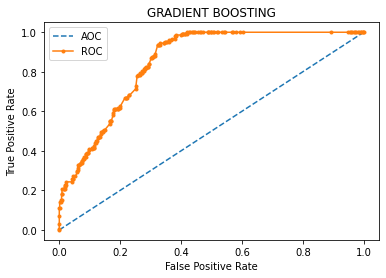

In [69]:
#PLOTTING AUC AND ROC FOR CLASSIFICATION PROBLEM 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from matplotlib import pyplot
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)   #training data

ns_probs = [0 for _ in range(len(Y_test))]
# fit a model
#ensemble learning works on boosting parallel learning from the errror from the 
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(X_train,Y_train)   #fitting training data

# predict probabilities
lr_probs = GBC.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('AUC=%.3f' % (ns_auc))
print('ROC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='AOC')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("GRADIENT BOOSTING")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [70]:
#XGBOOST  BEST MODEL

In [71]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [72]:
#fitting data
#prediction for training data
#prediction for testing data
y_pred=claasifier_tune.predict(X_train)
y_pred1=claasifier_tune.predict(X_test)
print("The train accuracy of the random forest randizedtuned:",accuracy_score(Y_train,y_pred)*100)
print("The test accuracy of the random forest randizedtuned:",accuracy_score(Y_test,y_pred1)*100)



The train accuracy of the random forest randizedtuned: 85.96959189117098
The test accuracy of the random forest randizedtuned: 86.67377398720683


In [75]:
#prediction for XG boost
from xgboost import XGBClassifier
y_pred = xgb.predict(X_train)                  #prediction for the training data
y_pred[:20]                                     #predction for the first 20 values


from sklearn.model_selection import RandomizedSearchCV
#RandomizedSearchCV-tuning approach which works on sample of the dataset
from scipy.stats import randint  #for random integer values

est =XGBClassifier()
rf_p_dist={
    'subsample':[0.8,0.2,0.5,0.4,0.36],                        
    'min_child_weight':[5,10,15,4,2],
    'max_depth':[1,2,3,5,4],
    'gamma':[0.1,0.2,0.5,0.60,0.8,0.91]
}
def hypertuning_grid(est, rf_p_dist, nbr_iter,X_train,Y_train):
    rdmsearch = RandomizedSearchCV(est, param_distributions=rf_p_dist,
                                  n_jobs=-1, n_iter=nbr_iter, cv=15)
    rdmsearch.fit(X_train,Y_train)                  #fitting data
    ht_params = rdmsearch.best_params_             #best paramter
    ht_score = rdmsearch.best_score_                     #best scorer
    return ht_params, ht_score                      #returning values for the best accuracy and the best paprmeters



In [76]:

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 15, X_train, Y_train)
#classifier,iteartions,ttraining data
rf_parameters
print("best parameters  :",rf_parameters)
print("best scorer  :",rf_ht_score*100)


best parameters  : {'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 5, 'gamma': 0.91}
best scorer  : 85.51604806408545


AUC=0.500
ROC=0.842


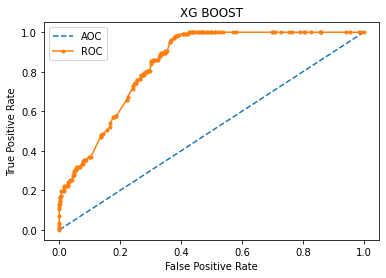

In [77]:
#PLOTTING AUC AND ROC FOR CLASSIFICATION PROBLEM 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from matplotlib import pyplot
ns_probs = [0 for _ in range(len(Y_test))]
# fit a model
#ensemble learning works on boosting parallel learning from the errror from the 
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

# predict probabilities
lr_probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('AUC=%.3f' % (ns_auc))
print('ROC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='AOC')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("XG BOOST")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


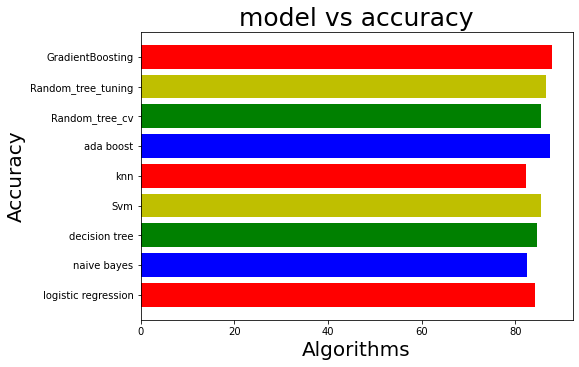

In [79]:

#Bar plot for training data
fig = plt.figure()  #creating anew figure
ax = fig.add_axes([0,0,1,1])#width,height
Algorithms = ['logistic regression','naive bayes','decision tree','Svm','knn','ada boost','Random_tree_cv','Random_tree_tuning','GradientBoosting']
accuracy = [84.2,82.5,84.648,85.382,82.3,87.409,85.463,86.567,87.803]
ax.barh(Algorithms,accuracy,color='rbgy')                  #horizontal bargraph with color

plt.title("model vs accuracy",fontsize=25)           #label of title
plt.xlabel("Algorithms",fontsize=20)                       #X label
plt.ylabel("Accuracy",fontsize=20)                             #Y label
plt.show()                                                     #creating plot

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


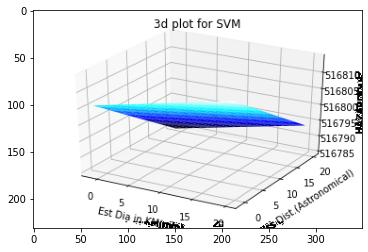

In [88]:
#Saving all the images and then used in if andd else loop 
import cv2
import matplotlib.pyplot  as plt
#reading the images in the form of arrays
img = cv2.imread('knn1.png')
img1 = cv2.imread('knn2.png')
img2 = cv2.imread('svm.png')
img3 = cv2.imread('svm3d.png')
img4 = cv2.imread('ADA.png')
img5 = cv2.imread('models.png')
#plotting the images in the png format
plt.imshow(img)
plt.imshow(img1)
plt.imshow(img2)
plt.imshow(img3)
plt.imshow(img4)
plt.imshow(img5)

print(plt.imshow(img5))

print(plt.imshow(img4))
print(plt.imshow(img))
print(plt.imshow(img2))
print(plt.imshow(img1))

print(plt.imshow(img3))

PRESS KEY
1.KNN for featuere selection of K 
2.KNN for CROSS VALIDATION 
3.KNN CAMPARE CROSS VALIDATION VS ACCUARCY OF THE BEST K VALUE
4.SVC ACCURACY FOR TRANING AND TESTING ACCURACY
5.SVC CROSS VALIDATION AND HYPERPLANE:
6.Random forest randizedtuned
7.Random forest accuracy,precesion,recall
8.Time of random and grid searchCV and accuracy
9.Comparing the time of tuning methods and plotting graph
10.Models ACCUARCY
11.Xg boost acuuracy with tuning9
Accuracy of the training ada boost gridsearch    : 86.70944251800479
accuracy of training data  for ada Ransearch_cv  : 83.70232309746328
Bar plot for the differnece in the time 
AxesImage(54,36;334.8x217.44)


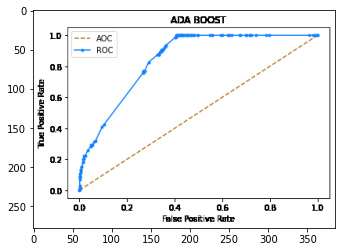

In [91]:
#Enter the name of classifier and then check the value for it
classifier_search = int(input('PRESS KEY\n1.KNN for featuere selection of K \n2.KNN for CROSS VALIDATION \n3.KNN CAMPARE CROSS VALIDATION VS ACCUARCY OF THE BEST K VALUE\n4.SVC ACCURACY FOR TRANING AND TESTING ACCURACY\n5.SVC CROSS VALIDATION AND HYPERPLANE:\n6.Random forest randizedtuned\n7.Random forest accuracy,precesion,recall\n8.Time of random and grid searchCV and accuracy\n9.Comparing the time of tuning methods and plotting graph\n10.Models ACCUARCY\n11.Xg boost acuuracy with tuning')) 

if classifier_search== 1: 
    print("KNN")
    print("For the values k=9 to k=1:",mean_acc)

    print(plt.imshow(img))

elif classifier_search==2: 
    print("Croos validation score for Cv=10 for 10 values of k",score)
    print("Croos validation score for Cv=10 for 10 values of k mean",score.mean())
    print(plt.imshow(img1))

elif classifier_search==3:
    print("The best accuracy of k is 2    k=2 & its acuuracy value is 84.482")
    print("Accuracy with K-NN and K-FOLD CROSS VALIDATION: %0.2f     STD--> (+/- %f)" % (score.mean()*100, score.std() *2))
    print("Switch to other model")
    
elif classifier_search==4:

    print("training accuracy for SVC:",accuracy_score(Y_train,y_pred))
    print("test accuracy  for SVC   :",accuracy_score(Y_test,y_pred1))    
    print("The 3d plot of the SVC  ",plt.imshow(img2))
elif classifier_search==5:
    print("The hyperplane of the points  SVC(3-D)  ",plt.imshow(img3))
    print(report)
    print("The accuracy of the SVM will be:",accuracy_score(Y_train,y_pred))

elif classifier_search==6:    
    print(" RANDOM FOREST TUNED ")
    print("The train accuracy of the random forest randizedtuned:",accuracy_score(Y_train,y_pred)*100)
    print("The test accuracy of the random forest randizedtuned:",accuracy_score(Y_test,y_pred1)*100)

elif classifier_search==7:

    print("The value of training data for 10 values:")
    print(cross_val)
    print("  The value of training data mean:",cross_val.mean()*100)
    print(" ")
    print(" ")
    print("The value of training data for 10 values of precsion:")
    print(cross_val1)
    print("  The value of training data mean:",cross_val1.mean()*100)
    print(" ")
    print(" ")
    print("The value of training data for 10 values of recall:")
    print(cross_val2)
    print("  The value of training data mean:",cross_val2.mean()*100)
    
elif classifier_search==8:
    
    print("train_time_ada_rand_tune  :",train_time_adatune)
    print("accuracy of training data ",rf_ht_score_ran*100)
    print("train_ada_grid",train_aadagrid)
    print("Accuracy of the training ada boost gridsearch for each value",accuracy*100)
    
elif classifier_search==9:
    
    print("Accuracy of the training ada boost gridsearch    : 86.70944251800479")
    print("accuracy of training data  for ada Ransearch_cv  :"  ,rf_ht_score_ran*100)
    print("Bar plot for the differnece in the time ")
    print(plt.imshow(img4))
        

elif classifier_search==10:
    print("HERE ARE THE DIFFERENT MODELS AND THERE ACCURACY ")
    print(plt.imshow(img5))
elif classifier_search==11:
    print("Accuracy of the training xgboost random search : 88.36  ")
    
else :
    print("\t      Wrong Input Value")
    print(" Enter value lies betwwen 1 to 10 ")
    print("")
